# Redes Lógicas Tensoriais com LTNTorch: Uma Introdução com Exemplos Práticos


## O que é uma Rede Lógica Tensorial (LTN)?
O LTN é um framework Neuro-Simbólico (NeSi) que combina efetivamente o poder do deep learning (Tensores) com o rigor do raciocínio 
lógico (Lógica).

### A Ideia Central
Definir uma base de conhecimento lógico (KB) 
e usá-la como a função objetivo (ou função de perda) para um modelo neural.

### Como isso é Possível?
Isso é possível usando lógica fuzzy, que relaxa os valores de verdade clássicos (Verdadeiro/Falso ou 1/0) 
para um intervalo contínuo $[0, 1]$.

Isso torna as operações lógicas diferenciáveis, permitindo o aprendizado através da otimização padrão de 
gradient descent (descida de gradiente).


### O Conceito Fundamental: Lógica Real (Real Logic)
LTN é baseado em uma linguagem formal chamada "Lógica Real" (Real Logic).

- Domínios: São interpretados como Tensores no corpo dos números reais $\mathbb{R}^n$ (incluindo escalares, vetores, matrizes, etc.).
- "Aterramento" (Grounding, $\mathcal{G}$): Este é o termo do LTN para a "interpretação" da lógica. Ele mapeia símbolos lógicos para tensores e funções diferenciáveis:
    - Constantes (ex: 'a', 'b') $\rightarrow$ Tensores (ex: vetores de embedding em $\mathbb{R}^d$).
    - Predicados (ex: 'P(x)') $\rightarrow$ Funções Diferenciáveis (ex: uma rede neural) que mapeiam tensores para um valor de verdade em $[0, 1]$.Ex: $P: \mathbb{R}^d \rightarrow [0, 1]$
    - Funções (ex: 'f(x)') $\rightarrow$ Funções Diferenciáveis (ex: uma rede neural) que mapeiam tensores para outros tensores.Ex: $f: \mathbb{R}^d \rightarrow \mathbb{R}^m$

## Tornando a Lógica Diferenciável: Operadores Fuzzy

Para que o backpropagation funcione, precisamos substituir os operadores lógicos clássicos ($\land, \lor, \lnot, \forall, \exists, \implies$) por versões "fuzzy" que sejam diferenciáveis.

Conectivos (t-normas, t-conormas)
* Conjunção ($\land$): t-norma do produto:$\mathcal{A}_{\land}(u, v) = u \cdot v$
* Disjunção ($\lor$): t-conorma do produto:$\mathcal{A}_{\lor}(u, v) = u + v - u \cdot v$
* Negação ($\lnot$): Negação padrão:$\mathcal{A}_{\lnot}(u) = 1 - u$
* Implicação ($\implies$): Implicação de Reichenbach:$\mathcal{A}_{\implies}(u, v) = 1 - u + u \cdot v$

Quantificadores (Agregadores)
- Universal ($\forall x$): Média generalizada (p-mean error):$\mathcal{A}_{\forall}(u_1, ..., u_n) = 1 - \left(\frac{1}{n}\sum_{i=1}^{n}(1-u_{i})^{p}\right)^{\frac{1}{p}}$
- Existencial ($\exists x$): Média generalizada (p-mean):$\mathcal{A}_{\exists}(u_1, ..., u_n) = \left(\frac{1}{n}\sum_{i=1}^{n}u_{i}^{p}\right)^{\frac{1}{p}}$

Ponto Chave: Todas estas operações são diferenciáveis, permitindo-nos propagar gradientes através de fórmulas lógicas complexas.
    

O Framework LTNtorch

LTNtorch é a implementação prática desses conceitos em PyTorch. Ele fornece os blocos de construção fundamentais:
- ltn.Constant: Um tensor que representa uma constante lógica (ex: um embedding fixo).
- ltn.Variable: Um tensor para variáveis (ex: 'x', 'y') que serão usadas em quantificadores.
- ltn.Predicate: Um torch.nn.Module que retorna um valor em $[0, 1]$. É aqui que a rede neural "aprende".
- ltn.Function: Um torch.nn.Module que retorna um tensor.
- ltn.Connective: And, Or, Not, Implies.ltn.
- Quantifier: Forall, Exists.ltn.
- Aggregator: SatAgg (Agrega o nível de satisfação de todas as fórmulas na Base de Conhecimento).

O Processo de Aprendizado em 5 PassosO fluxo de trabalho para treinar um modelo LTN é o seguinte:

1. Definir a Base de Conhecimento (KB): Escreva seus axiomas (conhecimento prévio) usando os componentes do LTNtorch.
2. Aterramento (Grounding): Alimente os dados de treinamento (tensores PyTorch) nas ltn.Variable das fórmulas.
3. Avaliação: Calcule o nível de satisfação de toda a KB (um único valor em $[0, 1]$) usando SatAgg.
4. Cálculo da Perda (Loss): A perda é simplesmente $Loss = 1.0 - SatAgg(\text{KB})$. Nosso objetivo é minimizar essa perda, o que equivale a maximizar a satisfação da lógica.
5. Otimização: Use um otimizador padrão do PyTorch (como Adam) para fazer o backpropagate da perda e atualizar os parâmetros dos ltn.Predicate (as redes neurais).

## Tutorial Prático: Classificação Binária
Vamos aplicar esses conceitos a um problema simples de classificação binária (baseado em 1-binary_classification.ipynb

Problema: Classificar pontos 2D em duas classes, A (positiva) e Não-A (negativa).

Configuração do LTN:
1. Predicado: Precisamos de um predicado A(x) que aprenda "O ponto x pertence à classe A?". Vamos usar uma pequena rede neural (MLP) para isso.
2. Variáveis: Precisamos de variáveis para conter nossos dados: x_A (exemplos positivos) e x_B (exemplos negativos).
3. Base de Conhecimento (Axiomas):
   - Axioma 1: Todos os exemplos positivos devem ser A.
     * $\forall x_A (A(x_A))$
   - Axioma 2: Todos os exemplos negativos NÃO devem ser A.
     * $\forall x_B (\lnot A(x_B))$

In [34]:
!pip install LTNtorch

### Código: 1. 
Imports e Definição do ModeloPrimeiro, importamos torch e ltntorch, e definimos nossa rede neural (MLP) que servirá como o predicado. Esta rede neural é o componente que irá aprender.import torc

In [36]:
# Código 1
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import ltn
import random 
#import ltn as ltntorch
import numpy as np
import matplotlib.pyplot as plt

# Configura o LTNtorch para usar o dispositivo (GPU se disponível)
ltntorch.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {ltntorch.device}")

class MLP(nn.Module):
    """Define um Perceptron Multicamadas (MLP) simples."""
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid() # Sigmoid força a saída para [0, 1]

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

Usando dispositivo: cpu


### Código: 2. Geração de Dados
Criamos alguns dados 2D de exemplo. A Classe A (positiva) está no centro, e a Classe B (negativa) está ao redor.


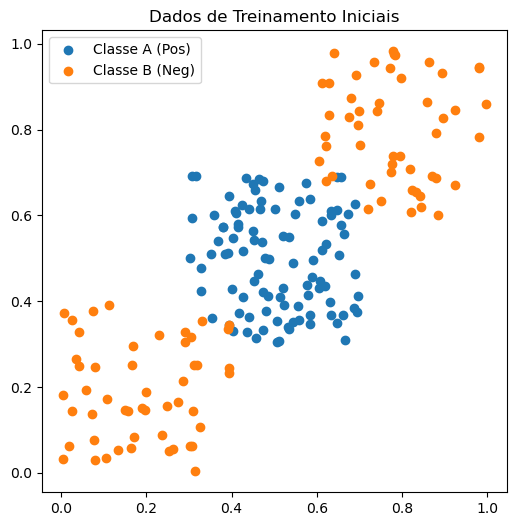

In [37]:
# Gerando dados de exemplo
# Classe A (Positiva) - Centro (0.5, 0.5)
data_pos = (torch.rand((100, 2)) * 0.4 + 0.3).to(ltntorch.device)
# Classe B (Negativa) - Pontos fora do centro
data_neg_1 = (torch.rand((50, 2)) * 0.4).to(ltntorch.device)
data_neg_2 = (torch.rand((50, 2)) * 0.4 + 0.6).to(ltntorch.device)
data_neg = torch.cat((data_neg_1, data_neg_2))

# Visualização dos dados (movendo para CPU para matplotlib)
plt.figure(figsize=(6, 6))
plt.scatter(data_pos.cpu()[:, 0], data_pos.cpu()[:, 1], label='Classe A (Pos)')
plt.scatter(data_neg.cpu()[:, 0], data_neg.cpu()[:, 1], label='Classe B (Neg)')
plt.title('Dados de Treinamento Iniciais')
plt.legend()
plt.show()


### Código: 3. Definição da Lógica LTN

Agora, instanciamos nossos componentes LTN.
* ltn.Predicate "embrulha" nosso modelo MLP, identificando-o como um predicado lógico.
* SatAgg é o agregador que usaremos para calcular a satisfação total da nossa base de conhecimento.


In [38]:
# Define o Predicado A
# Ele usa nosso MLP para mapear uma entrada de 2D para 1D (valor de verdade)
A_model = MLP(2, 16, 1).to(ltntorch.device)
A = ltntorch.Predicate(A_model)

In [40]:
# Define os Agregadores e Otimizador
# Define logical operators
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard())
And = ltn.Connective(ltn.fuzzy_ops.AndProd())
Or = ltn.Connective(ltn.fuzzy_ops.OrProbSum())
Implies = ltn.Connective(ltn.fuzzy_ops.ImpliesReichenbach())
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
Exists = ltn.Quantifier(ltn.fuzzy_ops.AggregPMean(p=2), quantifier="e")
# SatAgg (Agregador de Satisfação) calculará a satisfação total da KB
sat_agg = ltn.fuzzy_ops.SatAgg()
# Otimizador padrão do PyTorch
optimizer = torch.optim.Adam(A.parameters(), lr=0.001)

## Código: 4. O Loop de Treinamento
Este é o núcleo do LTN.
1. Definimos ltn.Variable para nossos dados.
2. Formulamos nossos dois axiomas usando ltn.Forall, ltn.Not e o predicado A.
3. Calculamos a satisfação total (sat) da KB agregando os axiomas.
4. A perda (loss) é 1.0 - sat. Queremos maximizar a satisfação, então minimizamos 1.0 - sat.
5. Usamos loss.backward() e optimizer.step() como em qualquer treinamento PyTorch.


In [41]:
# Loop de Treinamento
for epoch in range(1000):
    optimizer.zero_grad()

    # 1. Defina as variáveis LTN com os dados de treinamento
    x_A = ltn.Variable("x_A", data_pos)
    x_B = ltn.Variable("x_B", data_neg)

    # 2. Formule os axiomas
    # Axioma 1: Para todo x_A, A(x_A) deve ser verdadeiro
    axiom_A = Forall(x_A, A(x_A))
    
    # Axioma 2: Para todo x_B, Não(A(x_B)) deve ser verdadeiro
    axiom_B = Forall(x_B, Not(A(x_B)))

    # 3. Calcule a satisfação total da Base de Conhecimento
    sat = sat_agg(axiom_A, axiom_B)
    
    # 4. Calcule a perda (loss)
    loss = 1. - sat

    # 5. Backpropagation e Otimização
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Nível de Satisfação (Sat): {sat.item():.4f}, Perda (Loss): {loss.item():.4f}")

print("Treinamento concluído.")

Epoch 0: Nível de Satisfação (Sat): 0.4989, Perda (Loss): 0.5011
Epoch 100: Nível de Satisfação (Sat): 0.5042, Perda (Loss): 0.4958
Epoch 200: Nível de Satisfação (Sat): 0.5121, Perda (Loss): 0.4879
Epoch 300: Nível de Satisfação (Sat): 0.5251, Perda (Loss): 0.4749
Epoch 400: Nível de Satisfação (Sat): 0.5420, Perda (Loss): 0.4580
Epoch 500: Nível de Satisfação (Sat): 0.5666, Perda (Loss): 0.4334
Epoch 600: Nível de Satisfação (Sat): 0.5946, Perda (Loss): 0.4054
Epoch 700: Nível de Satisfação (Sat): 0.6276, Perda (Loss): 0.3724
Epoch 800: Nível de Satisfação (Sat): 0.6605, Perda (Loss): 0.3395
Epoch 900: Nível de Satisfação (Sat): 0.6899, Perda (Loss): 0.3101
Treinamento concluído.


## Código: 5. Visualização dos Resultados

Para ver o que o predicado A aprendeu, criamos uma grade (grid) de pontos e consultamos o predicado em cada ponto. Isso nos dá um "mapa de calor" do valor de verdade de A(x), que é o limite de decisão aprendido.# Cria uma grade de pontos para testar o modelo

In [28]:
grid_size = 20
x_grid = np.linspace(0, 1, grid_size)
y_grid = np.linspace(0, 1, grid_size)
xx, yy = np.meshgrid(x_grid, y_grid)
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)
grid_torch = torch.tensor(grid_points, dtype=torch.float32).to(ltntorch.device)

In [29]:
def create_predicate(model):
    class PredicateWrapper(nn.Module):
        def forward(self, x, y):
            # Handle LTNObjects
            x_val = x.value if hasattr(x, 'value') else x
            y_val = y.value if hasattr(y, 'value') else y
            
            # Your logic here
            output = model(x_val, y_val)
            
            # Ensure output is in [0, 1] and correct shape
            return torch.sigmoid(output.squeeze())
    
    return ltn.Predicate(PredicateWrapper())

In [33]:

# Obtém a predição (valor de verdade) para cada ponto na grade
with torch.no_grad():
    truth_values = A(grid_torch)# .cpu().numpy()

# Remodela para o formato da grade
zz = truth_values.reshape(xx.shape)

# Plota o limite de decisão (heatmap de satisfação)
plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, zz, levels=np.linspace(0, 1, 11), cmap="coolwarm", alpha=0.7)
plt.colorbar(label='Satisfação do Predicado A(x)')
# Plota os dados de treinamento originais por cima
plt.scatter(data_pos.cpu()[:, 0], data_pos.cpu()[:, 1], label='Classe A (Pos)', c='blue', edgecolors='k')
plt.scatter(data_neg.cpu()[:, 0], data_neg.cpu()[:, 1], label='Classe B (Neg)', c='red', edgecolors='k')
plt.title('Limite de Decisão Aprendido pelo Predicado A(x)')
plt.legend()
plt.show()


TypeError: Expected parameter 'inputs' to be a tuple of LTNObject, but got [<class 'torch.Tensor'>]